In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("Directorio actual:", os.getcwd())
# Mostrar todas las columnas
pd.set_option('display.max_columns', None)

# No truncar el DataFrame por ancho de pantalla
pd.set_option('display.width', 1000)

# No truncar las filas
pd.set_option('display.max_rows', None)

# No expandir el DataFrame en forma de bloques
pd.set_option('display.expand_frame_repr', False)

'''

Este conjunto de datos contiene una encuesta de satisfacción de los pasajeros de una aerolínea. ¿Qué factores están altamente correlacionados con un pasajero satisfecho (o insatisfecho)? ¿Se puede predecir la satisfacción de los pasajeros?

Contenido
Gender: Género de los pasajeros (Mujer, Hombre)
Customer Type: el tipo de cliente (cliente leal, cliente desleal)
Age: La edad real de los pasajeros.
Type of Travel: Propósito del vuelo de los pasajeros (Viaje Personal, Viaje de Negocios)
Class: Clase de viaje en el avión de los pasajeros (Business, Eco, Eco Plus)
Flight Distance: la distancia de vuelo de este viaje.
Inflight wifi service: Nivel de satisfacción del servicio wifi a bordo (0:No aplicable;1-5)
Departure/Arrival time convenient: Nivel de satisfacción de la hora de salida/llegada conveniente
Ease of Online booking: nivel de satisfacción de la reserva en línea
Gate location: Nivel de satisfacción de la ubicación de la puerta
Food and drink: Nivel de satisfacción de Comida y bebida
Online boarding: Nivel de satisfacción del embarque online
Seat comfort: Nivel de satisfacción del confort del asiento
Inflight entertainment: Nivel de satisfacción del entretenimiento a bordo
On-board service: Nivel de satisfacción del servicio a bordo
Leg room service: Nivel de satisfacción del servicio de habitaciones para piernas
Baggage handling: Nivel de satisfacción en el manejo de equipaje
Checkin service: Nivel de satisfacción del servicio de Check-in
Inflight service: Nivel de satisfacción del servicio a bordo
Cleanliness: Nivel de satisfacción de la Limpieza
Departure Delay in Minutes: Minutos de retraso a la salida
Arrival Delay in Minutes: Minutos de retraso cuando llega
satisfaction: Nivel de satisfacción de la aerolínea (Satisfacción, neutral o insatisfacción)
'''

'''Hipótesis sobre la Relación entre Edad y Satisfacción
Hipótesis: "Los visitantes mayores tienen un nivel de satisfacción más alto que los visitantes más jóvenes."
Gráfico sugerido: Un diagrama de caja para comparar la satisfacción por grupo de edad.
'''


Directorio actual: c:\Proyecto_data_science


'Hipótesis sobre la Relación entre Edad y Satisfacción\nHipótesis: "Los visitantes mayores tienen un nivel de satisfacción más alto que los visitantes más jóvenes."\nGráfico sugerido: Un diagrama de caja para comparar la satisfacción por grupo de edad.\n'

In [27]:
vuelos='C:\Proyecto_data_science\Vuelos satisfación.csv'
pf=pd.read_csv(vuelos,index_col=1)
p=pf.head(5)
print(p)
print("\n"*2)

'Verificacion y limpieza de datos'
miss=pf.isnull().sum()
print(miss)

'''' como los datos nulos solo eran 83 y no representaban ni el 5% de el aporte de los datos se modificaron a 0 para decir que no existio minutos de retraso a la llegada'''

pf['Arrival Delay in Minutes']=pf['Arrival Delay in Minutes'].replace(np.nan, 0)
print("\n"*2)

miss=pf.isnull().sum()
print(miss)
print("\n"*2)

#verficar tipos de datos
pf.info()
print("\n"*2)
# Encuentra columnas sin nombre y elimínalas debido a que no se utilizara como id
# Selecciona columnas con nombres que comiencen con 'Unnamed'
columns_to_drop = pf.columns[pf.columns.str.startswith('Unnamed')]
# Elimina esas columnas
pf = pf.drop(columns=columns_to_drop)

# Convertir columnas específicas a category
columns_to_convert = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness','satisfaction']
pf[columns_to_convert]=pf[columns_to_convert].astype('category')
# Convertir columnas específicas a float
pf['Departure Delay in Minutes']=pf['Departure Delay in Minutes'].astype('float')
pf.info()

       Unnamed: 0  Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  Inflight wifi service  Departure/Arrival time convenient  Ease of Online booking  Gate location  Food and drink  Online boarding  Seat comfort  Inflight entertainment  On-board service  Leg room service  Baggage handling  Checkin service  Inflight service  Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes             satisfaction
id                                                                                                                                                                                                                                                                                                                                                                                                                                                        
19556           0  Female     Loyal Customer   52  Business travel       Eco              160                     

In [28]:
'''Agrupar datos para crear grafico de hipotesis'''

menores_edad=pf[pf['Age']<18]
mayores_edad=pf[pf['Age']>=18]

# Contar los valores de 'satisfaction' en el grupo de mayores de edad
mayores_satisfaction_count= mayores_edad['satisfaction'].value_counts()

print("Conteo de satisfacción para mayores de edad:")
print(mayores_satisfaction_count)

# Contar los valores de 'satisfaction' en el grupo de menores de edad
menores_satisfaction_count= menores_edad['satisfaction'].value_counts()

print("\nConteo de satisfacción para menores de edad:")
print(menores_satisfaction_count)
print("\n"*2)
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

# Contar los valores de 'satisfaction' en el grupo de mayores de edad, dividos en generos
mayores_sat_gen= mayores_edad.groupby('Gender')['satisfaction'].value_counts().reset_index(name='count')
print(mayores_sat_gen)
print("\n")

# Contar los valores de 'satisfaction' en el grupo de mayores de edad, tipo de cliente
mayores_sat_cust= mayores_edad.groupby('Customer Type')['satisfaction'].value_counts().reset_index(name='count')
print(mayores_sat_cust)
print("\n")

# Contar los valores de 'satisfaction' en el grupo de mayores de edad, clase de vuelo
mayores_sat_class= mayores_edad.groupby('Class')['satisfaction'].value_counts().reset_index(name='count')
print(mayores_sat_class)
print("\n"*2)
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

# Contar los valores de 'satisfaction' en el grupo de menores de edad, dividos en generos
menores_sat_gen= menores_edad.groupby('Gender')['satisfaction'].value_counts().reset_index(name='count')
print(menores_sat_gen)
print("\n")

# Contar los valores de 'satisfaction' en el grupo de menores de edad, tipo de cliente
menores_sat_cust= menores_edad.groupby('Customer Type')['satisfaction'].value_counts().reset_index(name='count')
print(menores_sat_cust)
print("\n")

# Contar los valores de 'satisfaction' en el grupo de menores de edad, clase de vuelo
menores_sat_class= menores_edad.groupby('Class')['satisfaction'].value_counts().reset_index(name='count')
print(menores_sat_class)


Conteo de satisfacción para mayores de edad:
satisfaction
neutral or dissatisfied    13004
satisfied                  11056
Name: count, dtype: int64

Conteo de satisfacción para menores de edad:
satisfaction
neutral or dissatisfied    1569
satisfied                   347
Name: count, dtype: int64



   Gender             satisfaction  count
0  Female  neutral or dissatisfied   6664
1  Female                satisfied   5556
2    Male  neutral or dissatisfied   6340
3    Male                satisfied   5500


       Customer Type             satisfaction  count
0     Loyal Customer                satisfied   9939
1     Loyal Customer  neutral or dissatisfied   9634
2  disloyal Customer  neutral or dissatisfied   3370
3  disloyal Customer                satisfied   1117


      Class             satisfaction  count
0  Business                satisfied   8538
1  Business  neutral or dissatisfied   3647
2       Eco  neutral or dissatisfied   8089
3       Eco                satisfied   2067

C:\Users\juana\AppData\Local\Temp\ipykernel_12360\1954190929.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mayores_sat_gen= mayores_edad.groupby('Gender')['satisfaction'].value_counts().reset_index(name='count')
C:\Users\juana\AppData\Local\Temp\ipykernel_12360\1954190929.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mayores_sat_cust= mayores_edad.groupby('Customer Type')['satisfaction'].value_counts().reset_index(name='count')
C:\Users\juana\AppData\Local\Temp\ipykernel_12360\1954190929.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future ver

Text(0.02, 0.5, 'Conteo')

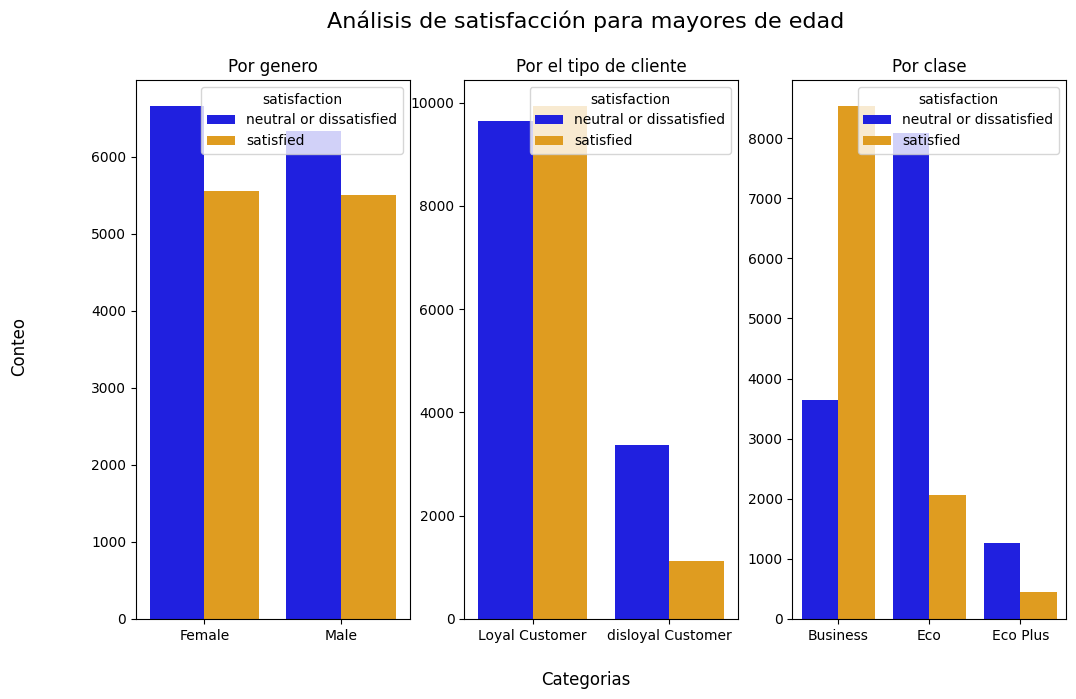

In [29]:
'''Graficos'''
# Configuración para el tamaño del gráfico
fig, axs =plt.subplots(1,3,figsize=(12,7))
green_red_palette = ['blue', 'orange']
# Crear barplot
sns.barplot(y='count', x='Gender',hue='satisfaction', data=mayores_sat_gen,ax=axs[0],palette=green_red_palette);
axs[0].set_title('Por genero')
axs[0].set_ylabel('')
axs[0].set_xlabel('')
sns.barplot(y='count', x='Customer Type',hue='satisfaction', data=mayores_sat_cust,ax=axs[1],palette=green_red_palette);
axs[1].set_title('Por el tipo de cliente')
axs[1].set_ylabel('')
axs[1].set_xlabel('')
sns.barplot(y='count', x='Class',hue='satisfaction', data=mayores_sat_class,ax=axs[2],palette=green_red_palette);
axs[2].set_title('Por clase')
axs[2].set_ylabel('')
axs[2].set_xlabel('')
fig.suptitle('Análisis de satisfacción para mayores de edad', fontsize=16)
fig.supxlabel('Categorias')
fig.supylabel('Conteo')

Text(0.02, 0.5, 'Conteo')

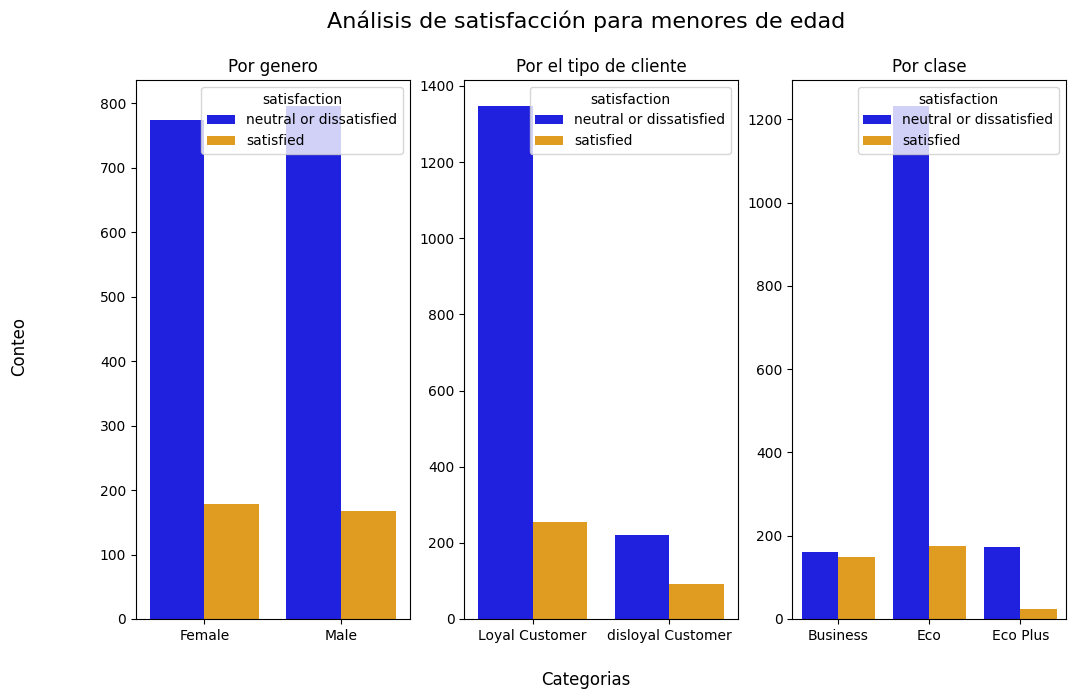

In [30]:
# Configuración para el tamaño del gráfico
fig, axs =plt.subplots(1,3,figsize=(12,7))
green_red_palette = ['blue', 'orange']
# Crear barplot
sns.barplot(y='count', x='Gender',hue='satisfaction', data=menores_sat_gen,ax=axs[0],palette=green_red_palette);
axs[0].set_title('Por genero')
axs[0].set_ylabel('')
axs[0].set_xlabel('')
sns.barplot(y='count', x='Customer Type',hue='satisfaction', data=menores_sat_cust,ax=axs[1],palette=green_red_palette);
axs[1].set_title('Por el tipo de cliente')
axs[1].set_ylabel('')
axs[1].set_xlabel('')
sns.barplot(y='count', x='Class',hue='satisfaction', data=menores_sat_class,ax=axs[2],palette=green_red_palette);
axs[2].set_title('Por clase')
axs[2].set_ylabel('')
axs[2].set_xlabel('')
fig.suptitle('Análisis de satisfacción para menores de edad', fontsize=16)
fig.supxlabel('Categorias')
fig.supylabel('Conteo')

Text(0, 0, 'Total: 1916')

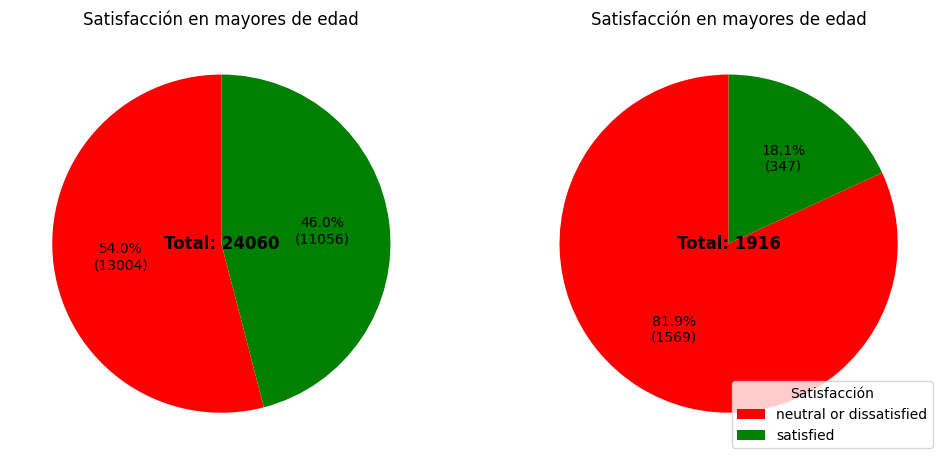

In [84]:
# Función para mostrar valores y porcentajes en el gráfico de pastel
def autopct_format(values):
    total = sum(values)  # Suma de todos los valores
    def my_autopct(pct):
        count = int(round(pct * total / 100.0))  # Valor absoluto
        return f'{pct:.1f}%\n({count})'  # Formato para porcentaje y conteo
    return my_autopct

# Crear subplots para gráficos de pastel
fig, ax = plt.subplots(1,2,figsize=(12, 6))  # 2 subplots lado a lado

# Gráfico de pastel para mayores de edad
ax[0].pie(list(mayores_satisfaction_count), autopct=autopct_format(list(mayores_satisfaction_count)),startangle=90, colors=['red', 'green']);
plt.legend(loc='lower right', title='Satisfacción',labels=mayores_satisfaction_count.keys(), fontsize='medium')
ax[0].set_title('Satisfacción en mayores de edad')
total_values1 = sum(mayores_satisfaction_count)
ax[0].text(0, 0, f"Total: {total_values1}", ha='center', va='center', fontsize=12, fontweight='bold')


# Gráfico de pastel para menores de edad
ax[1].pie(list(menores_satisfaction_count), autopct=autopct_format(list(menores_satisfaction_count)),startangle=90, colors=['red', 'green'],);
plt.legend(loc='lower right', title='Satisfacción',labels=menores_satisfaction_count.keys(), fontsize='medium')
ax[1].set_title('Satisfacción en mayores de edad')
total_values2 = sum(menores_satisfaction_count)
ax[1].text(0, 0, f"Total: {total_values2}", ha='center', va='center', fontsize=12, fontweight='bold')

